# EDA (Exploratory Data Analysis) of the dataset

In this notebook, explore the Abalone dataset, by showing relevant visualizations that help understand the problem you are modelling.

# Imports

In [2]:
%load_ext autoreload
%autoreload 2

# Imports Librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set some visual parameters
pd.set_option('display.max_columns', 500)
sns.set_theme(style="whitegrid")

# Enable plots to be displayed inline
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data

In [3]:
# Load the dataset
abalone_data_path = "../abalone/abalone.data"
column_names = [
    "Sex", "Length", "Diameter", "Height", "Whole weight",
    "Shucked weight", "Viscera weight", "Shell weight", "Rings"
]
abalone_df = pd.read_csv(abalone_data_path, names=column_names)

# Display basic information about the dataset
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# EDA

### Inspecting the Data

In [4]:
# Check basic information about the dataset
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


**Number of Entries**:
- The dataset contains 4177 entries and 9 columns, with no missing values across any of the columns (all non-null).

**Data Types**:
- `Sex` is a categorical variable represented as an object (string). This column will need special handling, such as converting it into numerical format (e.g., one-hot encoding or label encoding) for model building. The other columns are quantitative variables (i.e. integer and floats).

In [5]:
# Display a concise summary of numerical columns
abalone_df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


- The **mean number of rings** is approximately 9.93, with a standard deviation of 3.22. This implies that most abalones are close to 10 years old.
- Minimum `Height` is 0, which might indicate potential errors or outliers in the data.
- The **range of values** for the numerical features varies significantly, for example:
    - `Length` ranges from **0.075** to **0.815**.
    - `Whole weight`ranges from **0.002** to **2.8255**.
- **Distribution Insights**:
    - The **median (50th percentile)** for `Rings` is **9**, with:
        - 25% of abalones having **8 rings** or fewer.
        - 25% of abalones having **11 rings** or more.
    - For many of the weight-related features, the values are skewed, with much larger maximum values than the mean. For instance:
        - `Whole weight`: max of **2.8255** vs. mean of **0.8287**..

### Handling Outliers in `Height`

We noticed that there are some potential issues with the Height column having a minimum value of 0. While we won't handle it yet, we can visually inspect the outliers.

We can use a boxplot to check for any outliers in `Height`.

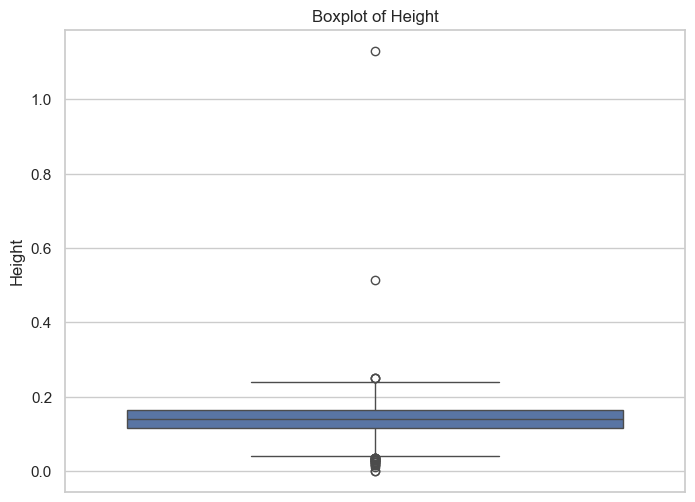

In [7]:
# Boxplot for Height to check for outliers
plt.figure(figsize=(8,6))
sns.boxplot(y='Height', data=abalone_df)
plt.title('Boxplot of Height')
plt.show()

**Observation**:
1. Outliers:
    - There are several outliers present above the whiskers, particularly one that exceeds a Height value of **1.0**, which seems unusually high.
    - There's also an outlier close to **0**, which might be problematic, as we discussed earlier (values close to **0** may indicate missing or incorrect data). 

2. Typical Range: 
    - The interquartile range (IQR), represented by the box, shows that most of the `Height` values fall between approximately **0.13** and **0.17**.
    - The median `Height` is just below 0.15.

### Exploring the Categorical Variable `Sex`

We have a categorical variable, `Sex`, which can be analyzed to understand how it impacts the target variable `Rings`.

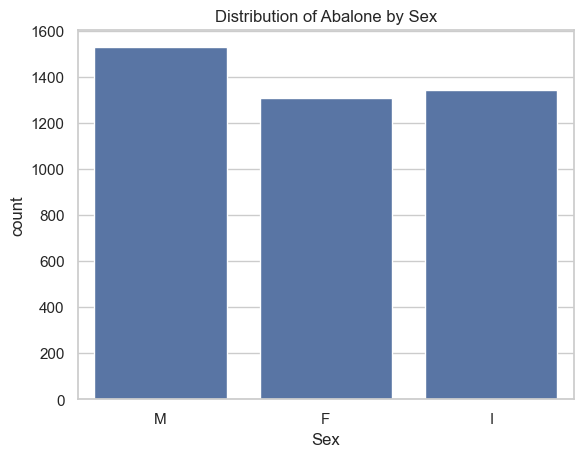

In [8]:
# Count plot for Sex distribution
sns.countplot(x='Sex', data=abalone_df)
plt.title('Distribution of Abalone by Sex')
plt.show()

- The bar plot shows the distribution of abalones by sex (M, F, and I). 
    - **Males** (M) are the most common, followed by **Infants** (I).
    - **Females** (F) are slightly less frequent but are still a substantial part of the dataset.
    - The distribution between the sexes is fairly balanced, though **Males** (M) seem to have a slight edge in frequency.


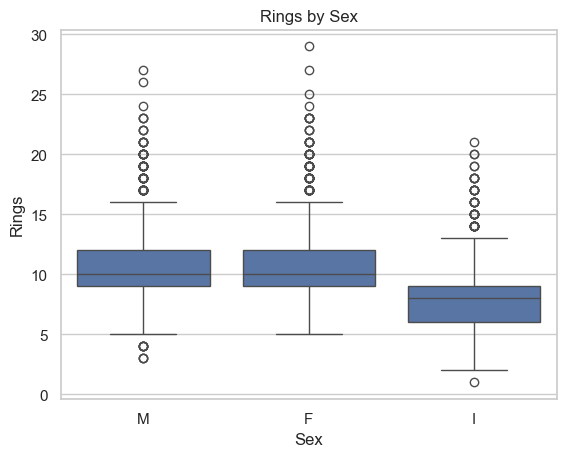

In [9]:
# Boxplot to visualize Rings by Sex
sns.boxplot(x='Sex', y='Rings', data=abalone_df)
plt.title('Rings by Sex')
plt.show()

- The boxplot displays the distribution of Rings (a proxy for the age of the abalone) by sex (M, F, and I).
    - **Males** (M) and **Females** (F) have a similar distribution in terms of Rings. The median number of Rings is approximately the same, around 10.
    - **Infants** (I), as expected, tend to have fewer Rings than adults (both male and female). The median Rings for infants is lower (around 7-8).
    - There are several **outliers** across all groups, especially for Rings greater than 20, with all groups showing some individuals with unusually high numbers of Rings.

**Insights**:
- **Infants** (I) tend to have a smaller range of Rings values, which aligns with their younger age compared to males and females.
- The **distribution** of Rings for males and females is similar, suggesting that sex might not be a strong factor in predicting Rings, though further analysis with statistical testing would be needed to confirm this.
- The presence of outliers indicates that some individuals within each group (especially males and females) have a significantly higher number of Rings.

###  Visualizing Distributions of Numerical Variables

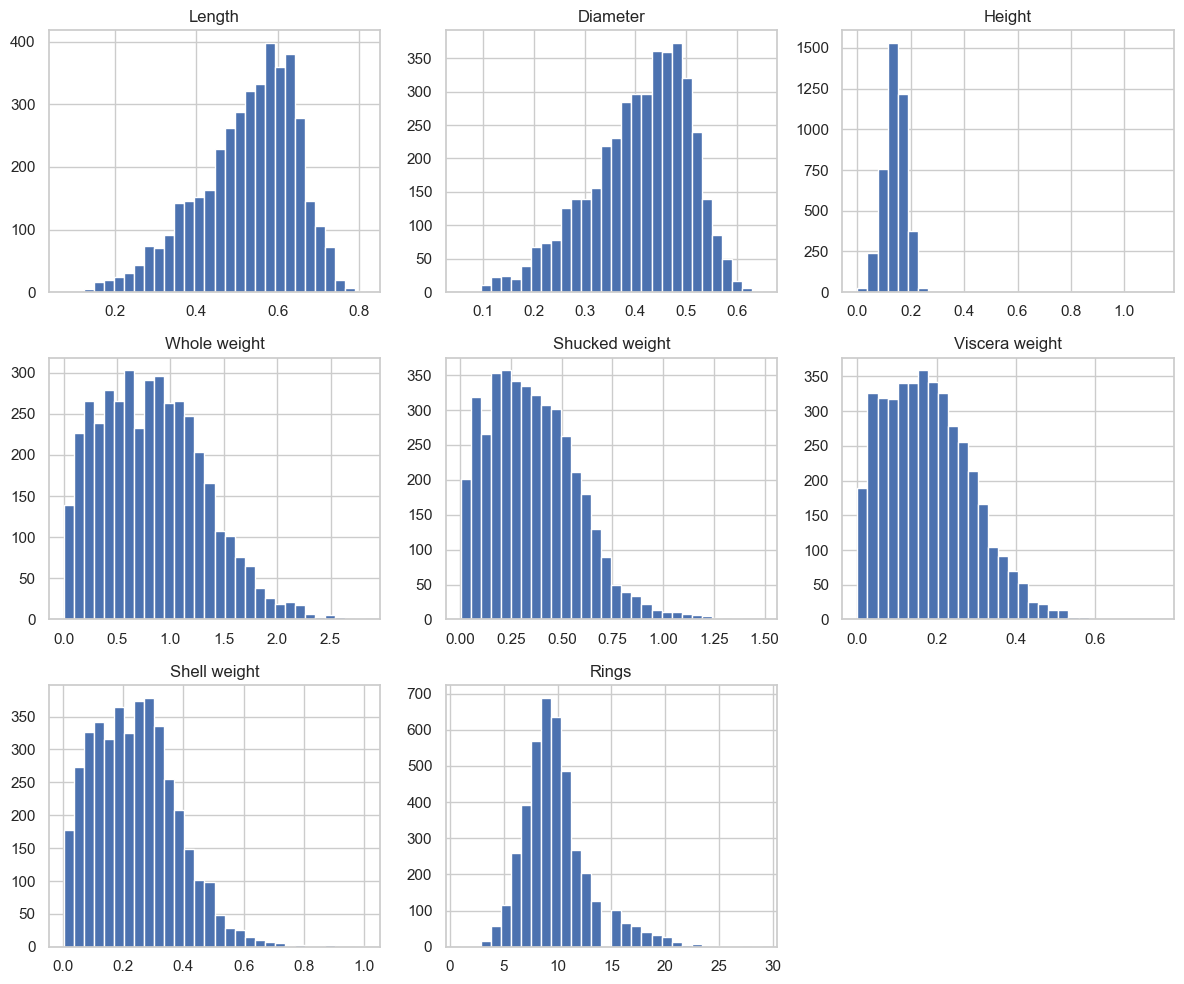

In [10]:
# Histograms of all numerical columns
abalone_df.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

**Key Observations**:
- **Length and Diameter**: 
    - Both Length and Diameter are normally distributed but are slightly left-skewed.
    - Most abalones have lengths around **0.5** to **0.6** and diameters around **0.35** to **0.45**.
- **Height**:
    - The Height distribution is notably skewed, with a high concentration of values near **0.15-0.20**.
    - There are some extremely high values (above 0.6), which we previously identified as potential outliers.
- **Weights**:
    - **Whole weight, Shucked weight, Viscera weight, and Shell weight** are all right-skewed, indicating that a small number of abalones have significantly higher weights.
    - The majority of the abalones have lower weights, with values clustering near the lower end of each weight variable.
- **Rings** (Target Variable):
    - Rings has a right-skewed distribution as well.
    - Most abalones have **8 to 12 rings**.
    - There are a few individuals with very high numbers of rings (up to 29), indicating potential outliers or particularly old abalones.

**Insights**:
- The weight-related variables (such as Whole weight, Shucked weight, and Viscera weight) are skewed and might benefit from transformation (e.g., log transformation) to normalize their distributions before applying certain machine learning models.
- The Rings variable is right-skewed, suggesting that the majority of abalones in the dataset are relatively young, with a few older individuals.
- The Height variable shows a noticeable concentration around 0.15-0.2, and the outliers (values above 0.6) should be investigated further.

###  Exploring Relationships Between Numerical Variables and Target


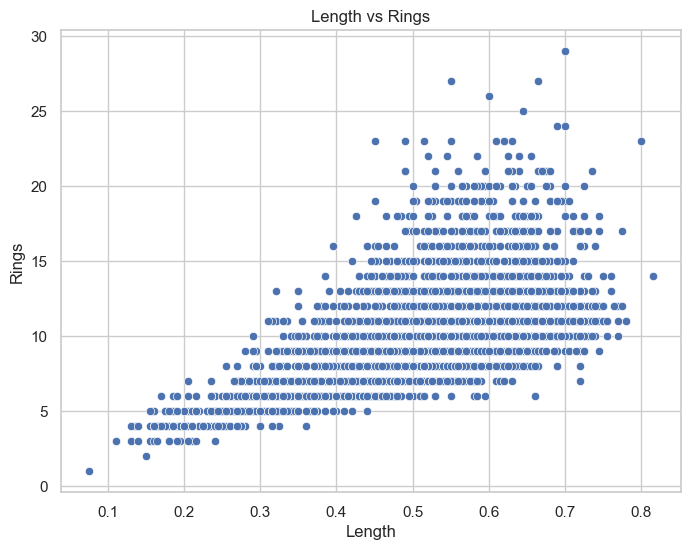

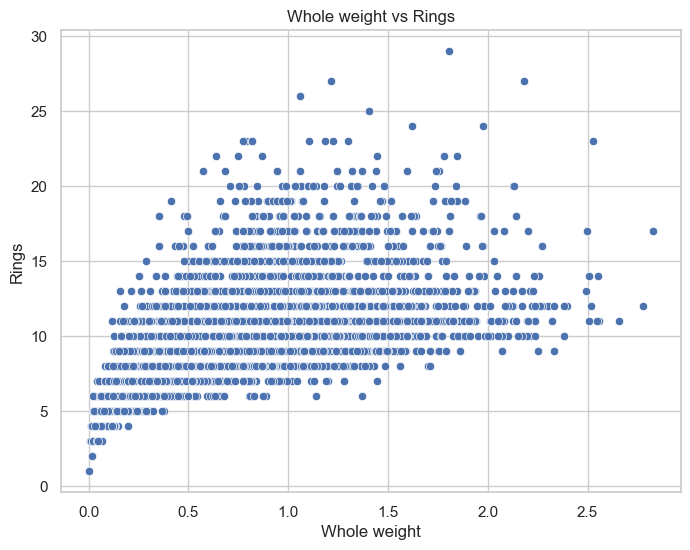

In [11]:
# Scatter plot of Length vs Rings
plt.figure(figsize=(8,6))
sns.scatterplot(x='Length', y='Rings', data=abalone_df)
plt.title('Length vs Rings')
plt.show()

# Scatter plot of Whole weight vs Rings
plt.figure(figsize=(8,6))
sns.scatterplot(x='Whole weight', y='Rings', data=abalone_df)
plt.title('Whole weight vs Rings')
plt.show()

**Observations**:
- **Length vs Rings** (First Plot):
    - There is a **positive correlation** between Length and Rings. As the length of the abalone increases, the number of rings (and thus the age) also tends to increase.
    - The data shows some **non-linearity** in the relationship, especially for abalones with higher numbers of rings, suggesting that factors other than length may play a role in determining age.
    - The spread in the higher age groups suggests that not all long abalones are old, indicating that Length alone is not a perfect predictor of age.
- **Whole Weight vs Rings** (Second Plot):
    - There is also a **positive correlation** between Whole weight and Rings, but the relationship seems to be less linear compared to the Length vs Rings plot.
    - For smaller abalones (with lower weights), the number of rings varies widely. For instance, abalones with a whole weight below 1.0 have anywhere from **0 to 20 rings**.
    - Similar to the length relationship, abalones with higher weights tend to have more rings, but the variance increases with larger weights.

**Insights** :
- **Length and Whole Weight** are both positively correlated with the number of Rings, which makes sense biologically as older abalones tend to grow in size and weight.
- However, the wide spread in the higher age groups suggests that while these features are important, they may not be sufficient alone to predict age accurately. Other factors, such as the environment or genetic factors, could contribute to the variance in age.

### Correlation Heatmap

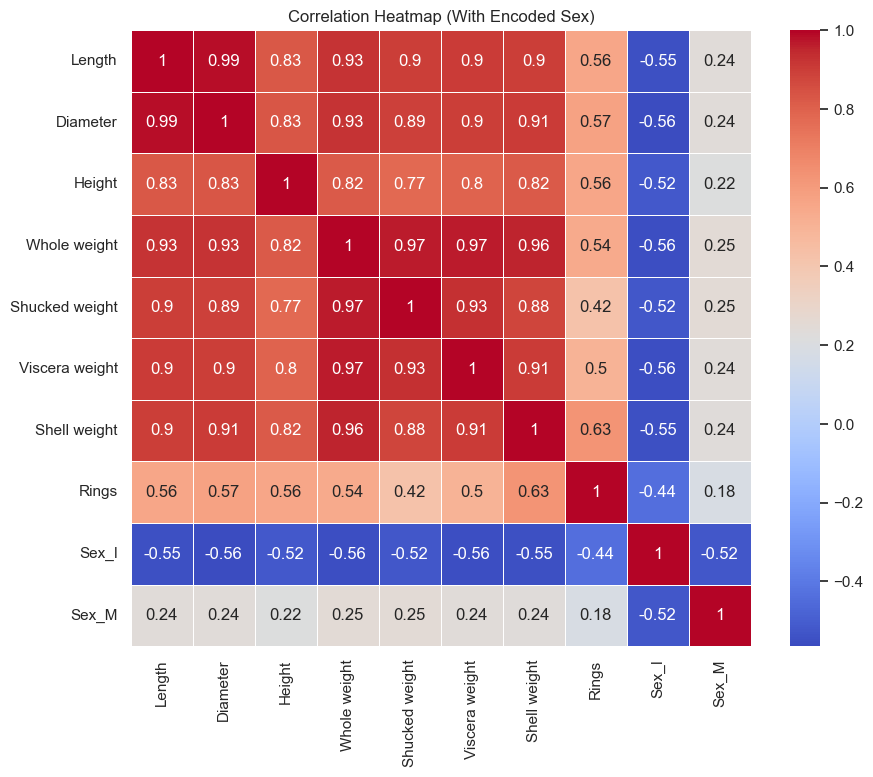

In [13]:
# One-hot encode the 'Sex' column
abalone_encoded = pd.get_dummies(abalone_df, columns=['Sex'], drop_first=True)

# Compute the correlation matrix on the encoded data
corr_matrix = abalone_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (With Encoded Sex)')
plt.show()

**Observations**:
1. **Strong Correlations** Among Weight and Size Features:
    - Length, Diameter, Whole weight, Shucked weight, Viscera weight, and Shell weight all show strong positive correlations with each other, mostly above **0.9**.
        - This indicates that these features are highly interrelated, which is expected since they all measure some aspect of the abalone's size and mass.
        - These strong correlations suggest that we might need to be cautious about **multicollinearity** when using these features in modeling (e.g., linear models).
2. **Rings (Target Variable) Correlation**:
    - Rings shows moderate positive correlations with several features:
        - Length: 0.56
        - Diameter: 0.57
        - Height: 0.56
        - Whole weight: 0.54
        - Shell weight: 0.63
        - Viscera weight: 0.50
        - The strongest correlation with Rings is Shell weight (0.63), suggesting that Shell weight could be a particularly important predictor of age.
    - While these are positive correlations, the values are moderate, indicating that Rings is not perfectly predictable using these features alone. There is likely room for improvement using a combination of these features or through feature engineering.
3. **Sex Correlation**:
    - Sex_I (Infant) has a negative correlation with most features, including:
        - Length: -0.55
        - Whole weight: -0.56
        - Rings: -0.44
        - This indicates that infants tend to be smaller and younger, which aligns with expectations.
    - Sex_M (Male) has small positive correlations with the size-related features but doesn't show a strong correlation with Rings (0.18).

**Insights**:
- **High Multicollinearity**: The features related to size and weight are highly correlated with each other. This suggests that when modeling, we might want to either remove some of these features or use techniques that can handle multicollinearity, such as regularization (e.g., Ridge or Lasso regression).
- **Moderate Correlation with Rings**: Features such as Length, Shell weight, and Height are moderately correlated with the target variable, but none show an extremely strong correlation. This suggests that while these features are useful, they may need to be used in combination with each other or with additional features for better prediction accuracy.
- **Sex as a Feature**: Infants (Sex_I) are smaller and have fewer rings, as expected. Males (Sex_M) and females (Sex_F, though not directly shown in the plot) don't seem to have a strong impact on the number of rings, indicating that sex might not be a critical predictor of age in the dataset.
